In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas
import seaborn as sns 
from niapy.problems import Problem
from niapy.task import Task
from niapy.algorithms.basic import ParticleSwarmOptimization
from sklearn.preprocessing import StandardScaler
import numpy as np
import time
from subprocess import check_output
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score
warnings.filterwarnings("ignore", category=FutureWarning)

# Dataset load

***abc***

In [3]:
#dataset = load_breast_cancer() 
global features
#X = dataset.data
#y = dataset.target
#feature_names = dataset.feature_names

features = [15]

df = pandas.read_csv("cancer.csv")
df.head()


,GENDER_ORIGINAL,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER_ORIGINAL,LUNG_CANCER
0,M,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES,1
1,M,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES,1
2,F,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO,0
3,M,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO,0
4,F,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO,0


In [4]:

class SVMFeatureSelection(Problem):
    def __init__(self, X_train, y_train, alpha=0.99):
        super().__init__(dimension=X_train.shape[1], lower=0, upper=1)
        self.X_train = X_train
        self.y_train = y_train
        self.alpha = alpha
        print(X_train)
        print(y_train)
    def _evaluate(self, x):
        selected = x > 0.5
        num_selected = selected.sum()
        if num_selected == 0:
            return 1.0
        accuracy = cross_val_score(RandomForestClassifier(n_estimators=100), self.X_train[:, selected], self.y_train, cv=2, n_jobs=-1).mean()
        score = 1 - accuracy
        num_features = self.X_train.shape[1]
        return self.alpha * score + (1 - self.alpha) * (num_selected / num_features)

In [5]:
# Scaler takes arrays
scaler = StandardScaler()

GENDER_X = np.array(df["GENDER"]).reshape(-1, 1)
df["GENDER"] = scaler.fit_transform(GENDER_X)

AGE_X = np.array(df["AGE"]).reshape(-1, 1)
df["AGE"] = scaler.fit_transform(AGE_X)

SMOKING_X = np.array(df["SMOKING"]).reshape(-1, 1)
df["SMOKING"] = scaler.fit_transform(SMOKING_X)

YELLOW_FINGERS_X = np.array(df["YELLOW_FINGERS"]).reshape(-1, 1)
df["YELLOW_FINGERS"] = scaler.fit_transform(YELLOW_FINGERS_X)

ANXIETY_X = np.array(df["ANXIETY"]).reshape(-1, 1)
df["ANXIETY"] = scaler.fit_transform(ANXIETY_X)

PEER_PRESSURE_X = np.array(df["PEER_PRESSURE"]).reshape(-1, 1)
df["PEER_PRESSURE"] = scaler.fit_transform(PEER_PRESSURE_X)

CHRONIC_DISEASE_X = np.array(df["CHRONIC_DISEASE"]).reshape(-1, 1)
df["CHRONIC_DISEASE"] = scaler.fit_transform(CHRONIC_DISEASE_X)

FATIGUE_X = np.array(df["FATIGUE "]).reshape(-1, 1)
df["FATIGUE "] = scaler.fit_transform(FATIGUE_X)

ALLERGY_X = np.array(df["ALLERGY"]).reshape(-1, 1)
df["ALLERGY"] = scaler.fit_transform(ALLERGY_X)

WHEEZING_X = np.array(df["WHEEZING"]).reshape(-1, 1)
df["WHEEZING"] = scaler.fit_transform(WHEEZING_X)

ALCOHOL_CONSUMING_X = np.array(df["ALCOHOL_CONSUMING"]).reshape(-1, 1)
df["ALCOHOL_CONSUMING"] = scaler.fit_transform(ALCOHOL_CONSUMING_X)

COUGHING_X = np.array(df["COUGHING"]).reshape(-1, 1)
df["COUGHING"] = scaler.fit_transform(COUGHING_X)

SHORTNESS_OF_BREATH_X = np.array(df["SHORTNESS_OF_BREATH"]).reshape(-1, 1)
df["SHORTNESS_OF_BREATH"] = scaler.fit_transform(SHORTNESS_OF_BREATH_X)

SWALLOWING_DIFFICULTY_X = np.array(df["SWALLOWING_DIFFICULTY"]).reshape(-1, 1)
df["SWALLOWING_DIFFICULTY"] = scaler.fit_transform(SWALLOWING_DIFFICULTY_X)

CHEST_PAIN_X = np.array(df["CHEST_PAIN"]).reshape(-1, 1)
df["CHEST_PAIN"] = scaler.fit_transform(CHEST_PAIN_X)

In [6]:
features.clear()

features.append('GENDER')
features.append('AGE')
features.append('SMOKING')
features.append('YELLOW_FINGERS')
features.append('ANXIETY')
features.append('PEER_PRESSURE')
features.append('CHRONIC_DISEASE')
features.append('FATIGUE ')
features.append('ALLERGY')
features.append('WHEEZING')
features.append('ALCOHOL_CONSUMING')
features.append('COUGHING')
features.append('SHORTNESS_OF_BREATH')
features.append('SWALLOWING_DIFFICULTY')
features.append('CHEST_PAIN')

In [7]:

X = df[features]
X=X.values
y = df['LUNG_CANCER']

In [8]:
# split data train 70 % and test 30 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1234)

In [9]:
problem = SVMFeatureSelection(X_train, y_train)
task = Task(problem, max_iters=100)
algorithm = ParticleSwarmOptimization(population_size=100, seed=1234)
best_features, best_fitness = algorithm.run(task)


[[ 0.95257934 -0.32611168  0.88083033 ... -1.33558369  1.06350105
   0.892475  ]
 [-1.04978132  1.25983337  0.88083033 ... -1.33558369  1.06350105
   0.892475  ]
 [-1.04978132  0.40586296  0.88083033 ...  0.74873631 -0.94029056
  -1.12047956]
 ...
 [-1.04978132  1.01584182  0.88083033 ... -1.33558369  1.06350105
   0.892475  ]
 [ 0.95257934  0.6498545   0.88083033 ... -1.33558369  1.06350105
   0.892475  ]
 [ 0.95257934  1.13783759 -1.13529242 ...  0.74873631 -0.94029056
   0.892475  ]]
267    1
162    1
123    1
141    1
294    1
      ..
246    1
277    0
65     1
70     1
11     1
Name: LUNG_CANCER, Length: 216, dtype: int64


In [10]:
selected_features = best_features > 0.5
print('Number of selected features:', selected_features.sum())
#print('Selected features:', ', '.join(features[selected_features].tolist()))
print(selected_features)
model_selected = RandomForestClassifier(n_estimators=100)
model_all = RandomForestClassifier(n_estimators=100)


Number of selected features: 4
[False False False  True False False  True False False False  True False
 False False  True]


In [11]:

model_selected.fit(X_train[:, selected_features], y_train)
print('Subset accuracy:', model_selected.score(X_test[:, selected_features], y_test))

Subset accuracy: 0.8709677419354839


In [12]:
model_all.fit(X_train, y_train)
print('All Features Accuracy:', model_all.score(X_test, y_test))
print('""""DONE"""')

All Features Accuracy: 0.8924731182795699
""""DONE"""


<AxesSubplot: >

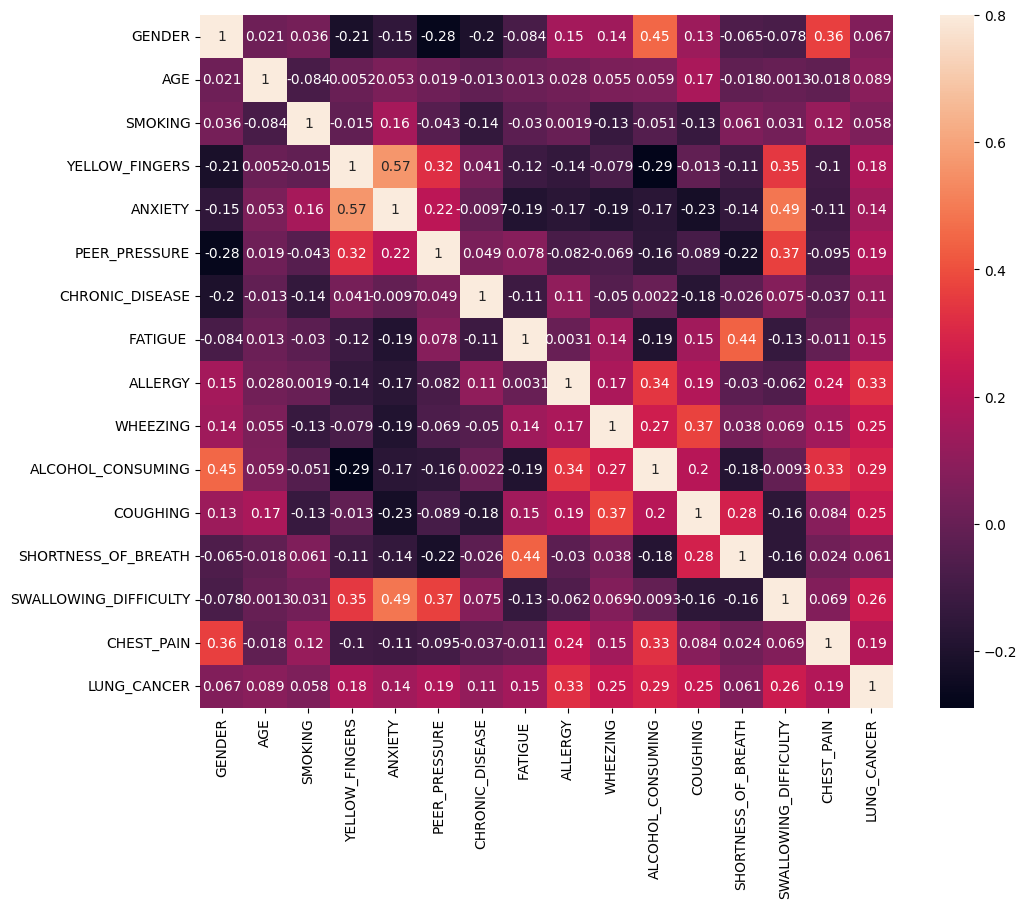

In [13]:
#correlation map
cor_mat=df.corr()
f, ax =plt.subplots(figsize=(12,9))
sns.heatmap(cor_mat,vmax=.8,square=True,annot=True)

Recall is:  0.9876543209876543
Accuracy is:  0.8924731182795699
F1 score is:  0.9411764705882353


<AxesSubplot: >

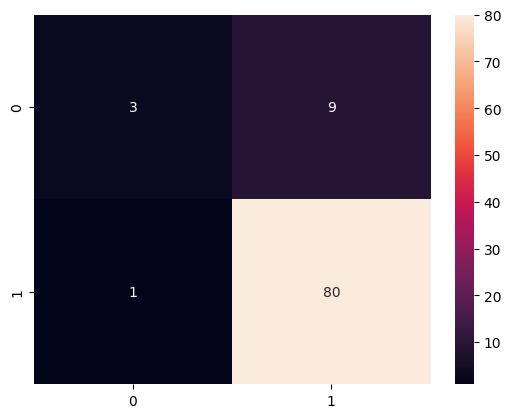

In [14]:
#It appears that the function recall_score needs to have y in a binary format, unlike accuracy_score can
#take into account the alphabetical format too.
#We write y in the binary format, with B=0 and M=1
y = y.replace("B", 0)
y = y.replace("M", 1)



#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(X_train,y_train)

recall = recall_score(y_test,clf_rf.predict(X_test))
print('Recall is: ', recall)
accuracy = accuracy_score(y_test,clf_rf.predict(X_test))
print('Accuracy is: ', accuracy)
f1 = f1_score(y_test,clf_rf.predict(X_test))
print('F1 score is: ', f1)
cm = confusion_matrix(y_test,clf_rf.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

In [16]:
from sklearn.feature_selection import RFECV

clf_rf_3 = RandomForestClassifier(random_state=43) 
rfecv = RFECV(estimator=clf_rf_3, step=1, cv=5, scoring='recall')   #5-fold cross-validation
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train)

Optimal number of features : 8
Best features : [[ 0.95257934 -0.32611168  0.88083033 ... -1.33558369  1.06350105
   0.892475  ]
 [-1.04978132  1.25983337  0.88083033 ... -1.33558369  1.06350105
   0.892475  ]
 [-1.04978132  0.40586296  0.88083033 ...  0.74873631 -0.94029056
  -1.12047956]
 ...
 [-1.04978132  1.01584182  0.88083033 ... -1.33558369  1.06350105
   0.892475  ]
 [ 0.95257934  0.6498545   0.88083033 ... -1.33558369  1.06350105
   0.892475  ]
 [ 0.95257934  1.13783759 -1.13529242 ...  0.74873631 -0.94029056
   0.892475  ]]


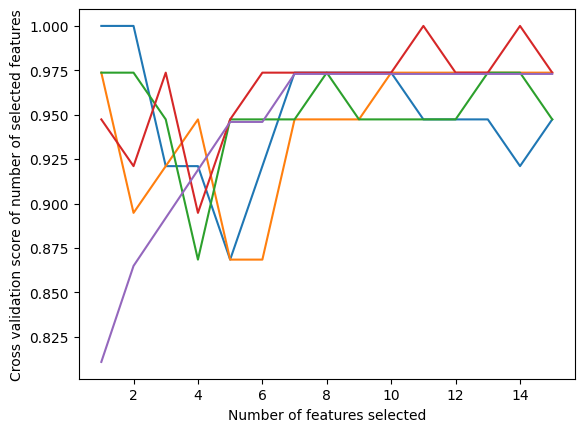

In [17]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

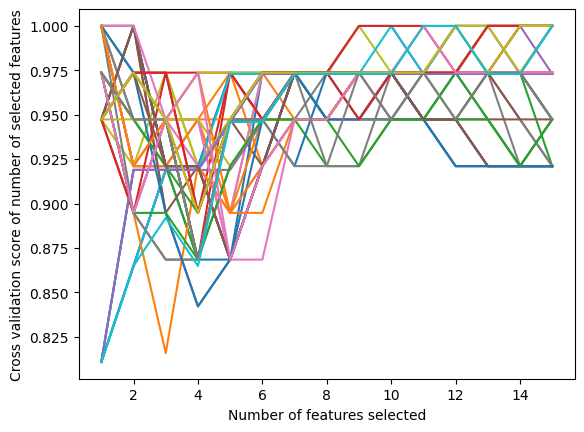

In [18]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")

for rs in range(10):
    clf_rf_4 = RandomForestClassifier(random_state = rs)
    rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5, scoring='recall')   #5-fold cross-validation
    rfecv = rfecv.fit(X_train, y_train)
    plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)

plt.show()